In [1]:
from db_connection import create_connection, query_data, query_sql_file, select_table

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Connect to MIMIC-III dataset
con = create_connection()

# Heart Rate in Adult Patients

In [4]:
query = \
"""
WITH agetbl AS
(
  SELECT ad.subject_id
  FROM admissions ad
  INNER JOIN patients p
  ON ad.subject_id = p.subject_id
  WHERE
  -- filter to only adults
  EXTRACT(YEAR FROM age(ad.admittime, p.dob)) > 15
  -- group by subject_id to ensure there is only 1 subject_id per row
  group by ad.subject_id
)
, hr as
(
  SELECT width_bucket(valuenum, 0, 300, 301) AS bucket
  FROM chartevents ce
  INNER JOIN agetbl
  ON ce.subject_id = agetbl.subject_id
  WHERE itemid in (211,220045)
)
SELECT bucket as heart_rate, count(*)
FROM hr
GROUP BY bucket
ORDER BY bucket;
"""

heart_rates_adults = query_data(query, con)
print(heart_rates_adults.head())

   heart_rate  count
0         0.0      2
1         1.0   2487
2         2.0      9
3         3.0     11
4         4.0     12


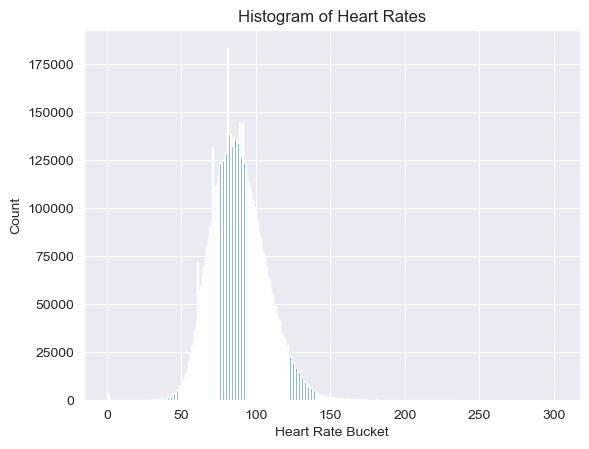

In [7]:
plt.bar(heart_rates_adults['heart_rate'], heart_rates_adults['count'])
plt.title('Histogram of Heart Rates')
plt.xlabel('Heart Rate Bucket')
plt.ylabel('Count')
plt.show()